# **LASSO** 
---

## **Main Concept**
---

LASSO (Least Absolute Shrinkage and Selection Operator) regression extends ordinary least squares by adding an $ L_1 $ penalty to induce sparsity in the coefficients. The mathematical formulation is:

> $
\hat{\beta} = \arg \min_{\beta} \left\{ \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right\}
$

where:
- $ y_i $ is the response variable,
- $ X_i $ is the feature matrix,
- $ \beta $ is the vector of coefficients,
- $ \lambda $ is a regularization parameter controlling the trade-off between model fit and sparsity,
- $ \sum_{j=1}^{p} |\beta_j| $ is the $ L_1 $-norm penalty.

### **How Feature Selection Happens**
1. **Shrinkage:** The $ L_1 $-norm encourages some coefficients to shrink toward zero more aggressively than ridge regression (which uses an $ L_2 $-norm penalty).
2. **Thresholding:** Because the optimization involves an absolute value, the solution exhibits a soft-thresholding effect, where some coefficients are exactly zero, effectively removing those features.
3. **Optimization:** Solving for $ \beta $ is done using coordinate descent or LARS (Least Angle Regression), ensuring efficient computation.

---

## **Derivation: How LASSO Forces Coefficients to Zero**  
---

LASSO regression solves the following optimization problem:

> $
\hat{\beta} = \arg \min_{\beta} \left\{ \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right\}
$

where $ \lambda $ is the regularization parameter that controls the sparsity of the model.

---

### **Step 1: Setting Up the Optimization Problem**  
We consider the **Lagrangian form** of LASSO:

> \$
L(\beta) = \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
\$

To understand how LASSO shrinks coefficients to zero, we analyze the solution for a **single feature case** ($ p=1 $).

---

### **Step 2: Computing the Gradient (Subdifferential)**
For standard least squares regression, the derivative of the squared loss w.r.t. $ \beta $ is:

> \$
\frac{\partial}{\partial \beta} \sum (y_i - x_i \beta)^2 = -2 \sum x_i (y_i - x_i \beta) = -2 X^T (y - X\beta)
\$

Adding the $ L_1 $-norm regularization term, the derivative becomes:

> \$
\frac{\partial}{\partial \beta} L(\beta) = -2 X^T (y - X\beta) + \lambda \cdot \text{sign}(\beta)
\$

Unlike $ L_2 $-regularization, which is differentiable, $ L_1 $-regularization introduces a **non-differentiable** point at $ \beta = 0 $. The gradient of $ |\beta| $ is given by:

> \$
\frac{d}{d\beta} |\beta| =
\begin{cases} 
+1, & \beta > 0 \\
-1, & \beta < 0 \\
\text{undefined}, & \beta = 0
\end{cases}
\$

---

### **Step 3: Soft-Thresholding Effect**
To find the optimal $ \beta $, we set the derivative to zero:

> \$
-2 X^T (y - X\beta) + \lambda \cdot \text{sign}(\beta) = 0
\$

Rearranging:

> \$
X^T (y - X\beta) = \frac{\lambda}{2} \text{sign}(\beta)
\$

Solving for $ \beta $:

> \$
\beta = \frac{1}{X^T X} \left( X^T y - \frac{\lambda}{2} \text{sign}(\beta) \right)
\$

#### **Key Observation**
- When $ X^T y $ (the correlation between feature $ X $ and target $ y $) is small, the penalty term $ \frac{\lambda}{2} $ dominates, pushing $ \beta $ to **exactly zero**.
- This is different from Ridge Regression, which shrinks coefficients **but never makes them exactly zero**.

---

### **Step 4: Generalizing to Multiple Features**
For multiple features, coordinate descent is used. The update rule for each $ \beta_j $ is:

> \$
\beta_j = \frac{S(X_j^T y, \lambda)}{X_j^T X_j}
\$

where $ S(X_j^T y, \lambda) $ is the **soft-thresholding function**:

> \$
S(\theta, \lambda) =
\begin{cases}
\theta - \lambda, & \theta > \lambda \\
0, & |\theta| \leq \lambda \\
\theta + \lambda, & \theta < -\lambda
\end{cases}
\$

where $ \theta = X_j^T y $. This means:
- If $ \theta $ (feature importance) is too small, $ \beta_j $ is set to **zero**.
- If $ \theta $ is large enough, $ \beta_j $ is only slightly shrunk.

---

### **Key Takeaways**
1. **LASSO encourages sparsity** because of the absolute value penalty, which forces some coefficients to become exactly zero.
2. **Soft-thresholding** is the key mechanism behind feature selection.
3. **Unlike Ridge Regression**, which reduces coefficients but keeps all of them, LASSO truly eliminates less important features.


---
## **More Indepth Derivation**
---

### **Understanding Why LASSO Pushes Some Coefficients to Exactly Zero**
LASSO minimizes the following **objective function**:

> \$
\min_{\beta} \frac{1}{2} \| y - X\beta \|^2 + \lambda \sum |\beta_j|
\$

where:
- The first term is the **least squares loss**.
- The second term is the **L1 penalty**, which encourages sparsity.

### **Looking at the Solution for a Single Feature**
For simplicity, consider a **single** predictor $ x $ (i.e., a univariate regression problem):

> \$
\min_{\beta} \frac{1}{2} \sum (y_i - x_i \beta)^2 + \lambda |\beta|
\$

The derivative with respect to $ \beta $ (ignoring constants) is:

> \$
X^T(y - X\beta) - \lambda \cdot \text{sign}(\beta) = 0
\$

Rearrange:

> \$
X^T y = X^T X \beta + \lambda \cdot \text{sign}(\beta)
\$

Now solve for $ \beta $:

> \$
\beta = \frac{X^T y - \lambda \cdot \text{sign}(\beta)}{X^T X}
\$

### **Why Some Coefficients Become Exactly Zero**
If $ X^T y $ (the correlation between feature $ X $ and target $ y $) is very small, then:

> \$
|X^T y| \leq \lambda
\$

This leads to:

> \$
\beta = 0
\$

In other words:
- When a feature is **weakly correlated** with $ y $, the penalty term $ \lambda \cdot \text{sign}(\beta) $ dominates, forcing $ \beta $ to be **exactly zero**.
- This is in contrast to **Ridge Regression**, where the squared penalty $ \lambda \beta^2 $ leads to **small but nonzero** coefficients.

### **Key Intuition**
LASSO applies a **soft-thresholding operator**:

> \$
\beta_j = \text{sign}(X^T y) \cdot \max(0, |X^T y| - \lambda)
\$

- If $ |X^T y| > \lambda $, then $ \beta $ is **shrunk** but remains nonzero.
- If $ |X^T y| \leq \lambda $, then $ \beta = 0 $, effectively **removing the feature** from the model.

This **hard thresholding effect** is the core reason why LASSO performs **feature selection** while Ridge does not.

## &darr; Implementation and Visualization of LASSO
---
- This reference code shows how LASSO regression works with different panelty factors
- Based on the same California Housing Dataset, can compare with RFE

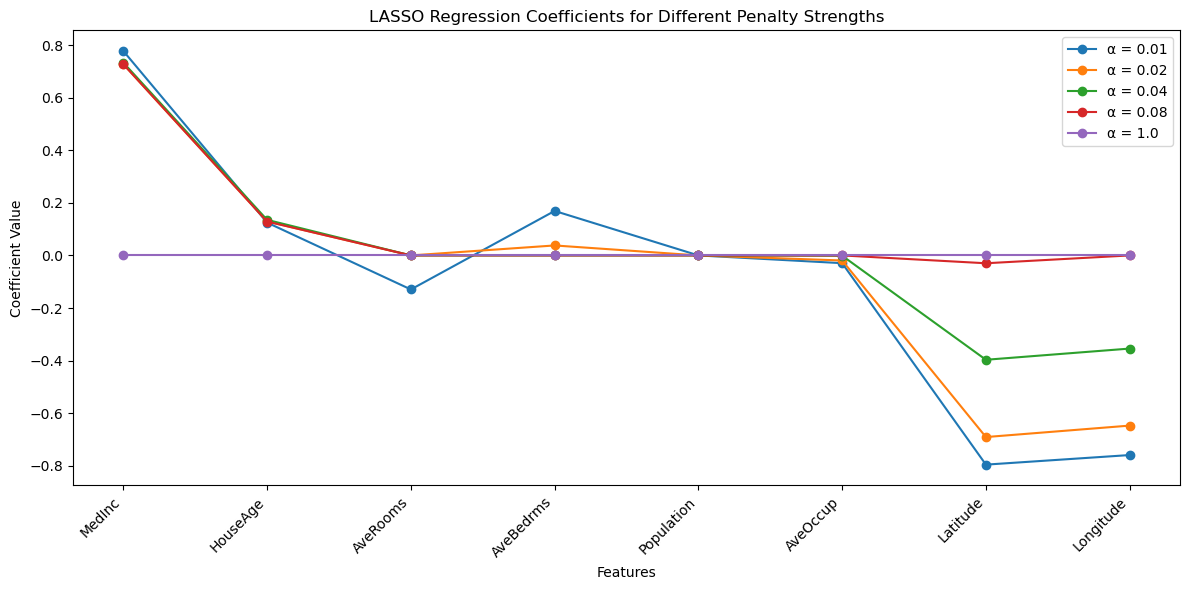


LASSO Coefficients for Different Alpha Values:
      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0.01  0.7772    0.1249   -0.1294     0.1691        -0.0   -0.0294   -0.7954   
0.02  0.7272    0.1294   -0.0000     0.0379        -0.0   -0.0193   -0.6906   
0.04  0.7331    0.1353   -0.0000     0.0000         0.0   -0.0011   -0.3967   
0.08  0.7269    0.1287   -0.0000     0.0000         0.0   -0.0000   -0.0298   
1.00  0.0000    0.0000    0.0000    -0.0000        -0.0   -0.0000   -0.0000   

      Longitude  
0.01    -0.7590  
0.02    -0.6470  
0.04    -0.3541  
0.08    -0.0000  
1.00    -0.0000  


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Fetch California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to run LASSO with different alpha values
def lasso_feature_selection(X, y, alphas):
    feature_importances = []
    
    plt.figure(figsize=(12, 6))
    
    for alpha in alphas:
        # Fit LASSO regression
        lasso = Lasso(alpha=alpha, max_iter=10000)
        lasso.fit(X, y)
        
        # Store feature coefficients
        feature_importances.append(lasso.coef_)
        
        # Plot coefficients
        plt.plot(california.feature_names, lasso.coef_, 
                 marker='o', label=f'α = {alpha}')
    
    plt.title('LASSO Regression Coefficients for Different Penalty Strengths')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Create DataFrame to show coefficient changes
    coef_df = pd.DataFrame(
        feature_importances, 
        columns=california.feature_names, 
        index=alphas
    )
    
    return coef_df

# Run LASSO with increasing alpha values
#alphas = [0.1, 0.5, 1.0, 2.0, 5.0]
alphas = [0.01, 0.02, 0.04, 0.08, 1.0]
lasso_coefficients = lasso_feature_selection(X_scaled, y, alphas)
print("\nLASSO Coefficients for Different Alpha Values:")
print(lasso_coefficients.round(4))

## &darr; LASSO Fitting Process
---
The following is the **coordinate descent** process that allows LASSO to converge to informative features.
- This is only for reference, not necessary the most effective implementation
- For example, from the result, the retained features include HouseAge, but not Lat/Lon. **Why?**

In [38]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

def stable_lasso_fit(X, y, alpha, max_iterations=1000, tolerance=1e-4):
    n_samples, n_features = X.shape
    coefficients = np.zeros(n_features)
    
    # Precompute X^T X diagonal for scaling
    XX_diag = np.sum(X * X, axis=0)
    
    for iteration in range(max_iterations):
        old_coefficients = coefficients.copy()
        
        for j in range(n_features):
            if XX_diag[j] == 0:
                continue
                
            # Remove current feature's contribution
            partial_residual = y - np.dot(X, coefficients) + coefficients[j] * X[:, j]
            
            # Calculate correlation and apply soft thresholding
            correlation = np.dot(X[:, j], partial_residual)
            
            # Soft thresholding with proper scaling
            coef = correlation / XX_diag[j]
            if coef > alpha:
                coefficients[j] = coef - alpha
            elif coef < -alpha:
                coefficients[j] = coef + alpha
            else:
                coefficients[j] = 0
        
        # Check convergence
        if np.sum(np.abs(coefficients - old_coefficients)) < tolerance:
            break
    
    return coefficients

# Prepare data
california = fetch_california_housing()
X = california.data
y = california.target

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = (y - y.mean()) / y.std()

# Test different alphas
alphas = [0.01, 0.05, 0.1]
results = []

for alpha in alphas:
    coef = stable_lasso_fit(X_scaled, y_scaled, alpha)
    results.append(coef)

# Show results
results_df = pd.DataFrame(results, 
                         columns=california.feature_names,
                         index=[f'alpha={alpha}' for alpha in alphas])
print("\nLASSO Coefficients:")
print(results_df.round(4))

# Count non-zero features
print("\nNumber of non-zero coefficients:")
for alpha, coef in zip(alphas, results):
    print(f"alpha={alpha}: {np.sum(np.abs(coef) > 1e-10)}")


LASSO Coefficients:
            MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
alpha=0.01  0.6664    0.1088   -0.0937     0.1281         0.0   -0.0241   
alpha=0.05  0.6406    0.1229    0.0000     0.0000         0.0    0.0000   
alpha=0.1   0.5972    0.0767    0.0000     0.0000         0.0    0.0000   

            Latitude  Longitude  
alpha=0.01   -0.6759    -0.6433  
alpha=0.05   -0.1335    -0.0964  
alpha=0.1     0.0000     0.0000  

Number of non-zero coefficients:
alpha=0.01: 7
alpha=0.05: 4
alpha=0.1: 2


## &uarr; Data Preprocessing
---
In the above code, StandardScaler.fit_transform() serves two key purposes:

1. Scale features to same range:
   - Different features have different units/scales (e.g., income in dollars vs. latitude in degrees)
   - Makes coefficients comparable
   - Prevents features with larger magnitudes from dominating

2. Improve numerical stability:
   - Large feature values can cause numerical overflow
   - Small values can cause underflow
   - **Standardization (mean=0, std=1)** helps prevent these issues

Example without scaling:
- MedInc: ~3-15 (dollars)
- Latitude: ~32-42 (degrees)
This disparity would bias the model toward features with larger scales.

---


## &darr; Extra - Correlation Matrix
----

LASSO Regression:
   - Uses L1 penalty to shrink coefficients
   - Can completely zero out less important features
   - Considers feature interactions and correlations

To better analysis correlation of features, we can use a correlation matrix to investigate **feature interactions**. The correlation analysis will reveal why different feature selection methods might prioritize different features.

A **correlation matrix** is a square matrix that contains the Pearson correlation coefficients between variables. Mathematically, for a dataset with $ n $ variables, the correlation matrix $ R $ is an $ n \times n $ symmetric matrix where each entry $ R_{ij} $ represents the Pearson correlation coefficient between the $ i $-th and $ j $-th variables.

### **Mathematical Definition**
Given a dataset with $ p $ variables and $ m $ observations, let $ X $ be an $ m \times p $ matrix where each column represents a variable:

> \$
X =
\begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1p} \\
x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \dots & x_{mp}
\end{bmatrix}
\$

The Pearson correlation coefficient between variables $ X_i $ and $ X_j $ is computed as:

> \$
R_{ij} = \frac{\text{Cov}(X_i, X_j)}{\sigma_{X_i} \sigma_{X_j}}
\$

where:
- $ \text{Cov}(X_i, X_j) = \frac{1}{m-1} \sum_{k=1}^{m} (x_{ki} - \bar{x}_i)(x_{kj} - \bar{x}_j) $ is the covariance,
- $ \sigma_{X_i} = \sqrt{\frac{1}{m-1} \sum_{k=1}^{m} (x_{ki} - \bar{x}_i)^2} $ is the standard deviation of $ X_i $,
- $ \bar{x}_i $ is the mean of $ X_i $.

Thus, the **correlation matrix** $ R $ is:

> \$
R =
\begin{bmatrix}
1 & R_{12} & R_{13} & \dots & R_{1p} \\
R_{21} & 1 & R_{23} & \dots & R_{2p} \\
R_{31} & R_{32} & 1 & \dots & R_{3p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
R_{p1} & R_{p2} & R_{p3} & \dots & 1
\end{bmatrix}
\$

### **Properties of a Correlation Matrix**
1. **Symmetric**: $ R_{ij} = R_{ji} $.
2. **Diagonal Elements are 1**: $ R_{ii} = 1 $, as a variable is perfectly correlated with itself.
3. **Positive Semi-Definite**: The eigenvalues of $ R $ are non-negative.
4. **Values range from -1 to 1**: $ R_{ij} \in [-1,1] $, where:
   - $ R_{ij} = 1 $ means perfect positive correlation.
   - $ R_{ij} = -1 $ means perfect negative correlation.
   - $ R_{ij} = 0 $ means no linear correlation.

The following is to take look at the feature correlations of the California Housing Data:

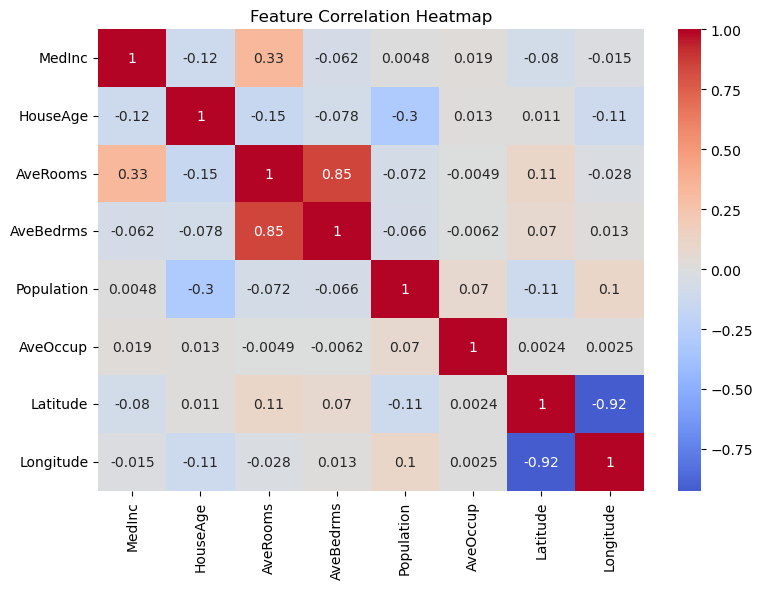


Highly Correlated Feature Pairs:
AveRooms - AveBedrms: 0.85
Latitude - Longitude: -0.92


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Fetch California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)

# Compute correlation matrix
correlation_matrix = X.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Print high correlation pairs
print("\nHighly Correlated Feature Pairs:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

**&uarr; Observation on Correlated Features:** 
- Latitude and Longitude are highly correlated
- AverageRooms and AveBedrms are highly correlated
- To a lesser extend, Propulation are somewhat correlated with HouseAge